<h1>Problema das N Rainhas</h1>
<h2>Busca Local</h2>
<p><b>Em um tabuleiro NxN, deve-se posicionar N rainhas de tal forma que elas não se ataquem</b></p>
<p>
F = Número de rainhas que não se atacam <br>
Min = 0 (Meta / Objetivo) <br>
Max = Combinaçao de N, 2 a 2. COMB(N,2) <br>
Para N = 8 <br>
Max = 8! / ((8-2)!*2!)-8*7/2 = 28 pares de rainha que não se atacam    
</p>

In [1]:
# Configuração Inicial
import logging as log
import sys

log.basicConfig(format='%(levelname)s : %(message)s', stream=sys.stdout)
root = log.getLogger()
root.setLevel(log.DEBUG)

logi = log.info
loge = log.error
logw = log.warning
logd = log.debug

In [2]:
# Importar as bibliotecas necessárias
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 7)
import math
import random
import copy
import itertools as it
TAMANHOTABULEIRODEFAULT = 8
DIRECAO = ['norte', 'nordeste', 'leste', 'sudeste', 'sul', 'sudoeste', 'oeste', 'noroeste'] # Direções de movimentação das rainhas

DEBUG : (private) matplotlib data path: /home/pedro/github/venvs/tcc/lib/python3.8/site-packages/matplotlib/mpl-data
DEBUG : matplotlib data path: /home/pedro/github/venvs/tcc/lib/python3.8/site-packages/matplotlib/mpl-data
DEBUG : CONFIGDIR=/home/pedro/.config/matplotlib
DEBUG : matplotlib version 3.3.4
DEBUG : interactive is False
DEBUG : platform is linux
DEBUG : loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_frozen_importlib_external', '_io', 'marshal', 'posix', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'importlib._bootstrap', 'importlib._bootstrap_exter

DEBUG : CACHEDIR=/home/pedro/.cache/matplotlib
DEBUG : Using fontManager instance from /home/pedro/.cache/matplotlib/fontlist-v330.json
DEBUG : Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG : Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [4]:
# Gerar tabuleiro com uma matriz t x t de zeros e com 1 (rainha) na primeira casa
# Representação do conhecimento / Ambiente
def geraTabuleiro(tamanho):
    if tamanho<2: return[-1]
    tab = []
    for i in range(tamanho):
        l=[]
        for j in range(tamanho):
            l.append(0)
        tab.append(l)
    for i in range(tamanho): tab[i][0] = 1
    return tab

In [5]:
# Gerar tabuleiro com uma matriz t x t de zeros e com 1 (rainha) aleatóriamente
# Representação do conhecimento / Ambiente
def geraTabuleiroAleatorio(tamanho):
    if tamanho<2: return[-1]
    tab = []
    for i in range(tamanho):
        l=[]
        for j in range(tamanho):
            l.append(0)
        tab.append(l)
    for i in range(tamanho): 
        c = random.randint(0, tamanho-1)
        tab[i][c] = 1
    return tab

In [6]:
# Imprimir o tabuleiro
def printTabuleiro(tab):
    for i in tab: print(i)

In [7]:
printTabuleiro(geraTabuleiroAleatorio(12))

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
# Localizar as rainhas no tabuleiro
# Sensor
def locateQueens(estado):
    q=[]
    for i in range(len(estado)):
        for j in range(len(estado)):
            if estado[i][j] == 1 : q.append((i,j))
    return q

In [9]:
# Teste Sensor
logd(locateQueens([[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0]]))

DEBUG : [(0, 0), (1, 1), (2, 1), (3, 2)]


In [10]:
# Calcular o numero de ataques no tabuleiro
# Performance
def calAtaques(estado):
    at=0
    atlinhas=0
    # ataque em linhas
    for i in estado:
        if sum(i)>1:
            atlinhas+=sum(i)-1
    at+=atlinhas
    
    # ataques em colunas
    atcolunas = 0
    for c in range(len(estado)):
        n1 = 0
        for l in range(len(estado)): n1 += estado[l][c]
        if n1>1:
            atcolunas += n1 - 1
    at+=atcolunas
    pr = locateQueens(estado)
    d=0
    # Ataques em diagonais
    for p, coords in enumerate(pr):
        i,j = coords
        # diagonal esquerda
        k,w = i+1,j-1
        while(w>=0 and k<len(estado)):
            if estado[k][w]==1:
                d+=1
                break
            w-=1
            k+=1
        # diagonal direita
        l,c = i+1, j+1
        while(1 < len(estado) and c<len(estado)):
            if estado[1][c]==1:
                d+=1
                break
            l+=1
            c+=1
    at+=d
    return at

In [11]:
# Teste da calculadora de ataques
logd(calAtaques([
[1, 0, 1, 0],
[0, 1, 1, 0],
[0, 0, 0, 0],
[0, 0, 1, 0]]))

DEBUG : 7


In [12]:
# Mover uma Rainha
# Atuador
def moveRainhaAleatoria(estado, passo):
    tam=len(estado)
    while True:
        i,j = random.choice(locateQueens(estado))
        k = (j+passo)%tam
        if estado[i][k] == 0:
            estado[i][k],estado[i][j] = estado[i][j],estado[i][k]
            break
    return estado

In [13]:
# teste Move Rainha

moveRainhaAleatoria([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0]],3)

[[1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0]]

In [14]:
def evolucaoFuncaoObjetivo(estado, passo, MAX):
    n = len(estado[0])
    ataques = []
    i = 0
    maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
    while i < MAX:
        atq = calAtaques(estado)
        ataques.append(maxAtaques - atq)
        if atq == 0:
            break
        estado = moveRainhaAleatoria(copy.deepcopy(estado), passo)
        i+=1
    
    x = range(len(ataques))
    plt.plot(x, ataques)
    plt.xlabel('Vizinhos Gerados')
    plt.ylabel('Função Objetivo')
    plt.title("Variação da função objetivo")
    plt.show()

DEBUG : findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG : findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG : findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG : findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) n

DEBUG : findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal 600 normal>) = 10.24
DEBUG : findfont: score(<Font 'Umpush' (Umpush-LightOblique.ttf) oblique normal 300 normal>) = 11.145
DEBUG : findfont: score(<Font 'Ubuntu' (Ubuntu-R.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Rasa' (Rasa-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'padmaa-Bold.1.1' (padmaa-Bold.1.1.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) norma

DEBUG : findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Yrsa' (Yrsa-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG : findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal 600 normal>) = 10.24
DEBUG : findfont: score(<Font 'Tibetan Machine Uni' (TibetanMachineUni.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Tlwg Mono' (TlwgMono-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-RI.ttf) italic normal 400

DEBUG : findfont: score(<Font 'Kinnari' (Kinnari-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'Purisa' (Purisa-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG : findfont: score(<Font 'Gayathri' (Gayathri-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Gayathri' (Gayathri-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'Yrsa' (Yrsa-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal 700 condensed>) = 10.535
DEBUG : findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 

DEBUG : findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG : findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
DEBUG : findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG : findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Umpush' (Umpush.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Liberation Serif' (Liberati

DEBUG : findfont: score(<Font 'Kinnari' (Kinnari-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'Sawasdee' (Sawasdee-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG : findfont: score(<Font 'P052' (P052-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'Mukti Narrow' (MuktiNarrowBold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 500 normal>) = 10.145
DEBUG : findfont: score(<Font 'Loma' (Loma-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'Tlwg Typo' (TlwgTypo-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'Padauk Book' (PadaukBook-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'C059' (C059-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG : findfont:

DEBUG : findfont: score(<Font 'KacstOffice' (KacstOffice.ttf) normal normal 500 normal>) = 10.145
DEBUG : findfont: score(<Font 'C059' (C059-Roman.otf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'RaghuMalayalamSans' (RaghuMalayalamSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'KacstOne' (KacstOne-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG : findfont: score(<Font 'Standard Symbols PS' (StandardSymbolsPS.otf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG : findfont: score(<Font 'Ani' (ani.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Gubbi' (Gubbi.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Vemana2000' (vemana2000.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'ori1Uni' (utkal.ttf) normal normal 500 normal>) = 10.145
DEBUG : findfont: score(<Font 'Kinnari' (Ki

DEBUG : findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG : findfont: score(<Font 'Kinnari' (Kinnari-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG : findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'Tlwg Typist' (TlwgTypist-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'KacstOne' (KacstOne.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'Pagul' (Pagul.ttf) normal normal 400 normal>) = 10.05
DEBUG : findfont: score(<Font 'KacstScreen' (KacstScreen.ttf) normal normal 500 normal>) = 10.145
DEBUG : findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG : findfont: score(<Font 'Norasi' (Norasi-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG : findfont: score(<Font 'mry_KacstQurn' (mry_KacstQurn.ttf) normal normal

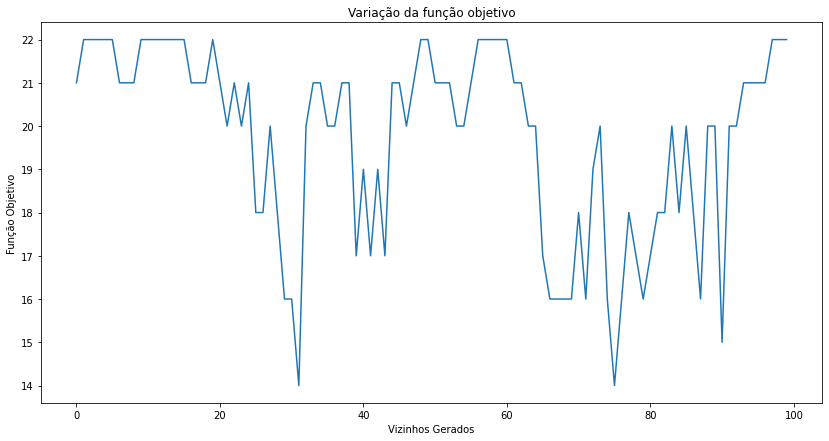

In [15]:
evolucaoFuncaoObjetivo(geraTabuleiro(8), 4, 100)

In [17]:
# Busca Local (Cega)
def buscaLocal(estado, passo):
    c = 0
    n = len(estado[0])
    maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
    ataques = []
    change = True
    while c < 10*len(estado):
        change = False
        atq = calAtaques(estado)
        ataques.append(maxAtaques - atq)
        if atq == 0:
            return "Solução", estado, atq, ataques
        suc =  moveRainhaAleatoria(copy.deepcopy(estado), passo)
        if calAtaques(suc) <= atq:
            estado = suc
            change = True
        if not change: c += 1
    return "falha", estado, atq, ataques
        
    


Função Executada com  falha
Último estado analisado
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0]


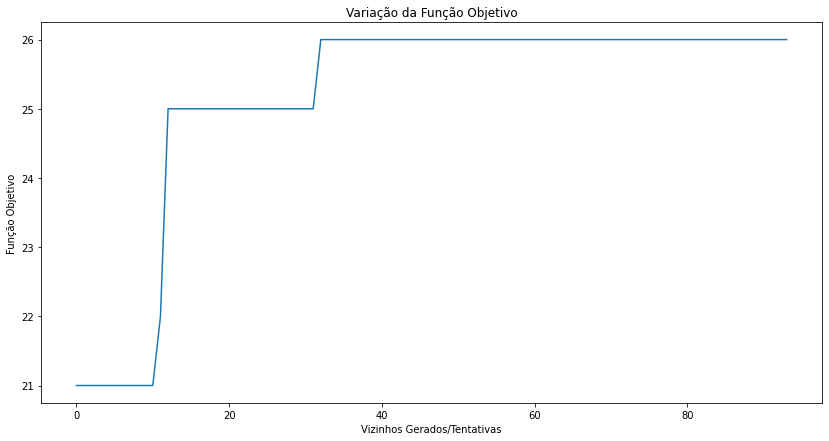

In [18]:
# Teste da função de Busca Cega
m,e,a,y = buscaLocal(geraTabuleiroAleatorio(8),3)
print("Função Executada com ", m)
print("Último estado analisado")
printTabuleiro(e)
x= range(len(y))
plt.plot(x, y)
plt.xlabel("Vizinhos Gerados/Tentativas")
plt.ylabel("Função Objetivo")
plt.title("Variação da Função Objetivo")
#plt.legend(loc="lower right")
plt.show()

In [19]:
sol = 0
fal = 0
for i in range(100):
    m,e,a,y = buscaLocal(geraTabuleiro(8),3)
    if (m == "Solução"):
        sol += 1
    else:
        fal += 1
print ("Tentativas: ", i+1)
print ("Solucionadas: ", sol)
print ("Falhas: ", fal)

Tentativas:  100
Solucionadas:  13
Falhas:  87
